# 矢量化

In [5]:
import numpy as np
import imageio as imgio
import scipy as sci
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
import skimage as ski
import skimage.color as skcolor
import skimage.io as skio
from scipy.ndimage.interpolation import zoom
from sklearn.cluster import KMeans
from skimage import measure
from matplotlib.patches import PathPatch
from matplotlib.path import Path

In [4]:
def findContours(src,n_clusters=3):
    h,w = src.shape[0],src.shape[1]
    im_small = src.copy()
    im_small_long = im_small.reshape((h * w, 3))
    im_small_wide = im_small_long.reshape((h,w,3))
    km = KMeans(n_clusters=n_clusters)
    km.fit(im_small_long)
    cc = km.cluster_centers_.astype(np.uint8)
    out = np.asarray([cc[i] for i in km.labels_]).reshape((h,w,3))
#     blob = np.asarray([cc[i] if i == 1 else [0,0,0] for i in km.labels_]).reshape((h,w,3))
    # 由聚类结果得到0,1二值单通道图像
    seg = np.asarray([(1 if i == 1 else 0)
                  for i in km.labels_]).reshape((h,w))
    # 找到轮廓，返回每个连续轮廓的列表，每个连续轮廓是一组坐标点
    contours = measure.find_contours(seg, 0.5, fully_connected="high")
    # 简化轮廓，近似为多边形，tolerance决定精度
    simplified_contours = [measure.approximate_polygon(c, tolerance=5) for c in contours]
    paths = [[[v[1], v[0]] for v in vs] for vs in simplified_contours]
    return simplified_contours

In [8]:
src = skio.imread('../datas/image4.jpg')
dst = findContours(src)

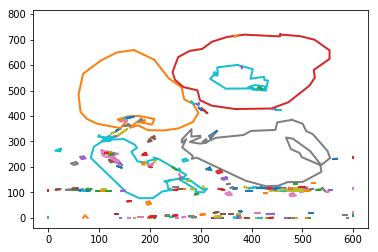

In [9]:
for n, contour in enumerate(dst):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2)

In [ ]:
https://www.jianshu.com/p/f8811ecf14f7